In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot

In [2]:
import os
os.getcwd()

'/Users/gabrielperez/Desktop/analise_de_dados/Series Temporais'

In [3]:
data = pd.read_excel ('teste2.xls')
data.head()

,Var1
0,400.780060
1,407.235554
2,415.237679
3,417.283586
4,415.173230


In [4]:
data.tail()

,Var1
195,597.530963
196,594.683502
197,587.196400
198,583.382851
199,580.289140


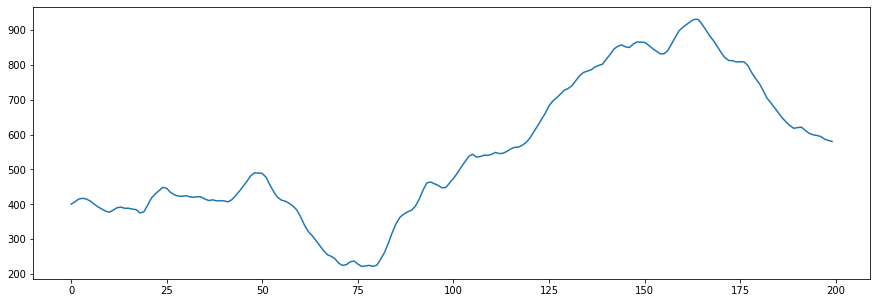

In [5]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(data['Var1'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


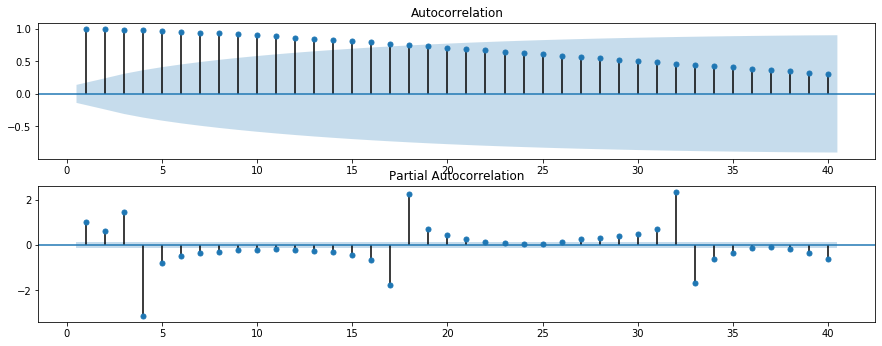

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data['Var1'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data['Var1'], lags=40, zero=False, ax=ax2)

In [7]:
dif = lambda x, i: x[i] - x[i-1]
d_xt = [dif(data['Var1'], i) for i in range(1, len(data))]
data_dxt = pd.DataFrame(d_xt, columns=['Diferenca'])
data_dxt.head()

,Diferenca
0,6.455494
1,8.002126
2,2.045907
3,-2.110356
4,-5.819419


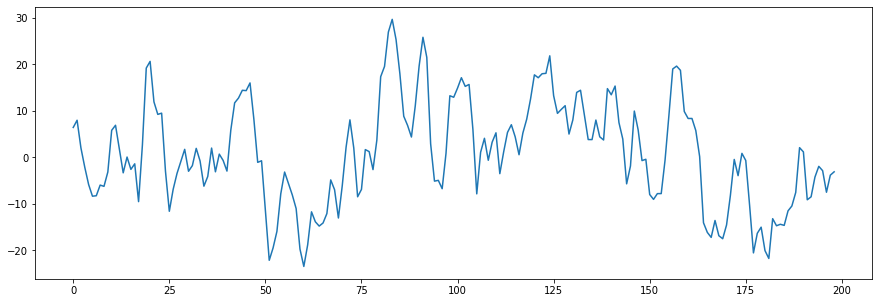

In [51]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(data_dxt['Diferenca'])

In [9]:
ACF, q, pq = ts.acf(data_dxt['Diferenca'], qstat=True, fft = False)
PACF = ts.pacf(data_dxt['Diferenca'])
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(>Q)"])

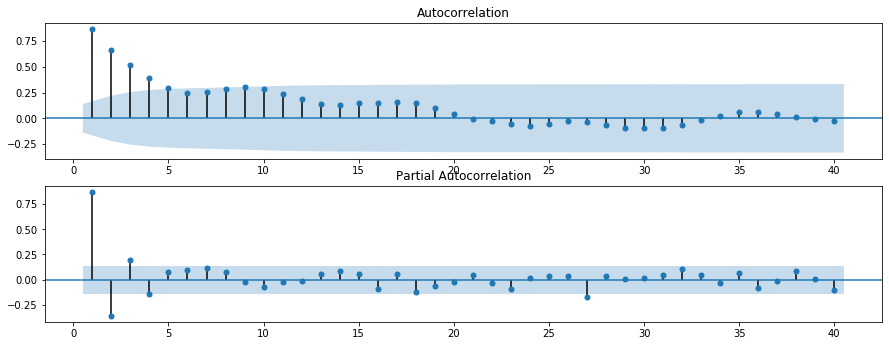

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data_dxt['Diferenca'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data_dxt['Diferenca'], lags=40, zero=False, ax=ax2)

In [43]:
modelo = sm.tsa.ARIMA(data['Var1'], (1, 1, 1))
modelo = modelo.fit(trend = 'nc', method = "css")
print(modelo.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Var1   No. Observations:                  199
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -604.555
Method:                           css   S.D. of innovations              5.126
Date:                Sat, 23 May 2020   AIC                           1215.111
Time:                        19:35:04   BIC                           1224.975
Sample:                             2   HQIC                          1219.104
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Var1     0.7618      0.050     15.148      0.000       0.663       0.860
ma.L1.D.Var1     0.5018      0.068      7.422      0.000       0.369       0.634
                                    Roots   

In [12]:
sm.stats.durbin_watson(modelo.resid.values)

2.0177432504438313

In [44]:
residuo = modelo.resid
residouquad = residuo**2
estimado = modelo.predict()
varerro = modelo.sigma2
residpad = residuo.values/np.sqrt(varerro)
tabela = np.c_[residuo, residpad]
resid = pd.DataFrame(tabela,  columns=['Residuo','Padronizados'])
n = len(residpad)

Esquisito pq deveria comparar com o valor original

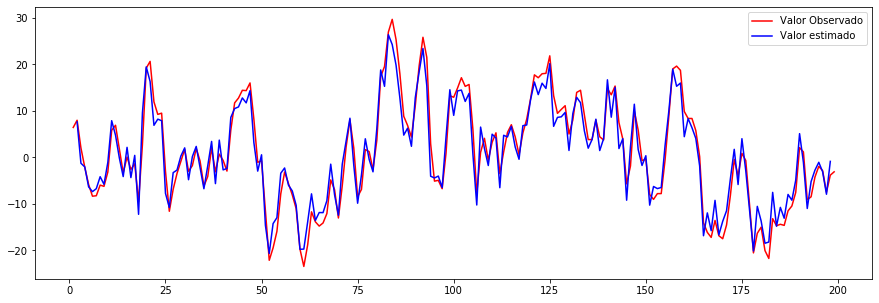

In [50]:
dif = len(data_dxt) - len(estimado)
x1 = range(dif, len(data_dxt))
x2 = range(1, len(data_dxt)+1)
fig, axes  =  plt.subplots(figsize = (15, 5))

axes.plot(x2, data_dxt['Diferenca'], 'r', label = 'Valor Observado') 
axes.plot(x1, estimado, 'b',  label = 'Valor estimado')

axes.legend()

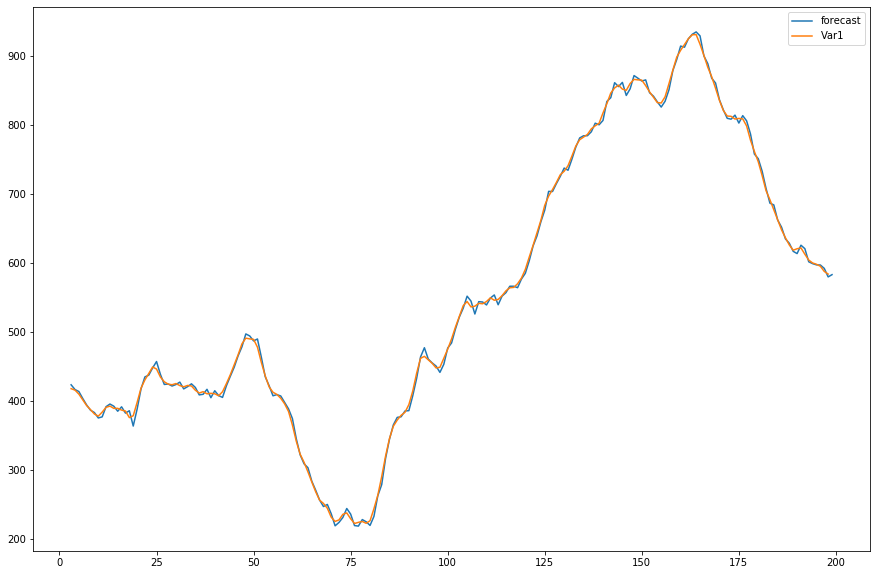

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
fig = modelo.plot_predict(end = 199, ax=ax)

In [39]:
len(x1)

196

In [15]:
ACF, q, pq = ts.acf(residuo, qstat=True, fft = False)
PACF = ts.pacf(residuo, method = 'ols')
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(Q>q)"])
tabela[0:10]

,lag,ACF,PACF,Q,Prob(Q>q)
0,1.0,-0.010724,-0.010729,0.023119,0.879148
1,2.0,-0.018201,-0.018341,0.090050,0.955974
2,3.0,0.032232,0.032223,0.301033,0.959834
3,4.0,0.030531,0.030916,0.491306,0.974342
4,5.0,-0.069907,-0.068875,1.494018,0.913759
5,6.0,-0.057326,-0.059268,2.171805,0.903239
6,7.0,-0.019142,-0.025494,2.247770,0.944864
7,8.0,0.063866,0.067654,3.097883,0.928065
8,9.0,0.123593,0.138596,6.298419,0.709720
9,10.0,0.051722,0.059647,6.861914,0.738414


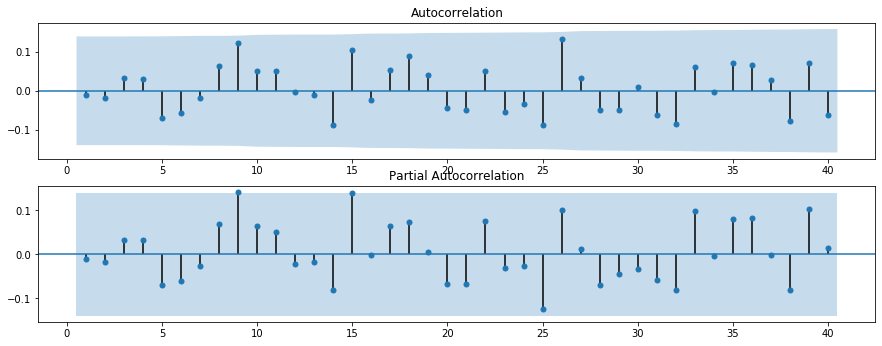

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))

fig = plot_acf(residuo, lags=40, zero=False, ax=ax1)
fig = plot_pacf(residuo, lags=40, zero=False, ax=ax2)

In [17]:
varerro = modelo.sigma2
residpad = residuo.values/np.sqrt(varerro)
residpad = pd.DataFrame(residpad,  columns=['Residuos Padronizados'])
n = len(residpad)
residpad.head()

,Residuos Padronizados
0,0.601633
1,-1.092021
2,-0.167767
3,-0.737410
4,-0.391759


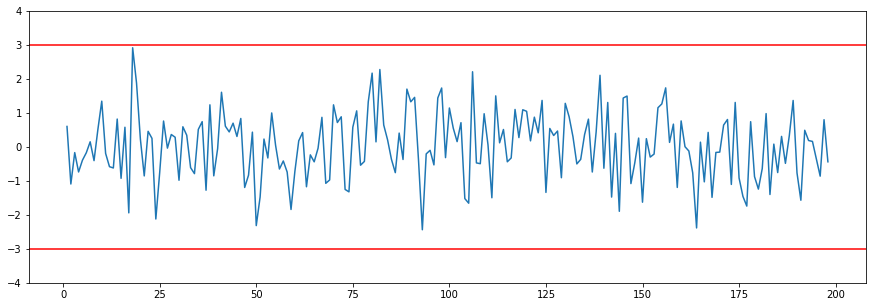

In [18]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(range(1, n + 1), residpad)
axes.set_ylim([-4, 4])
axes.axhline(y = 3, color = 'r')
axes.axhline(y = -3, color = 'r')

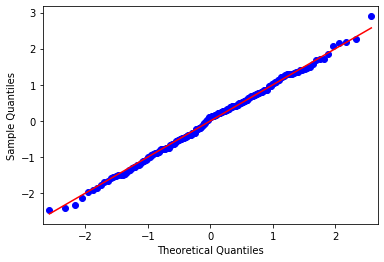

In [19]:
fig = sm.qqplot(resid['Residuo'], scipy.stats.norm, fit=True, line='s')

In [20]:
stat2, p2 = scipy.stats.jarque_bera(resid['Padronizados'])
print(f'Estatistica de teste: {stat2}; \nP-valor: {p2}')

Estatistica de teste: 0.546118731551429; 
P-valor: 0.7610476061063373


In [21]:
stat, valor_critico, alpha = scipy.stats.anderson(resid['Padronizados'], dist = 'norm')
print(f'Estatistica de teste: {stat}; \nValor Critico: {valor_critico}')

Estatistica de teste: 0.24033287121517333; 
Valor Critico: [0.565 0.643 0.772 0.9   1.071]


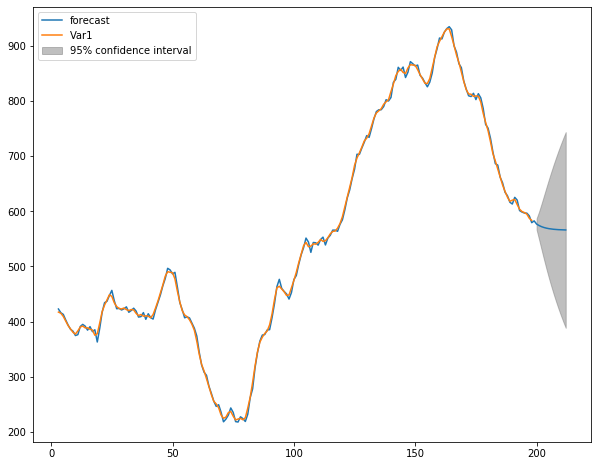

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
fig = modelo.plot_predict(end = 212, ax=ax)